In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

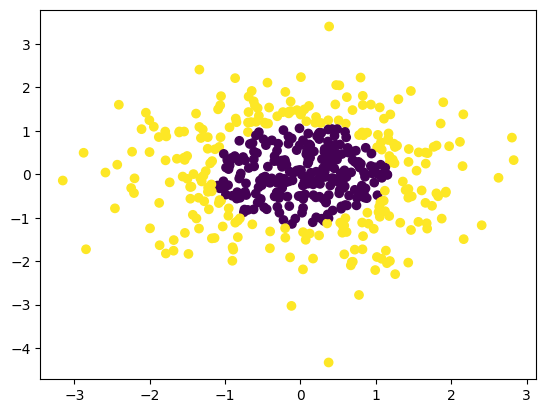

In [4]:
# 生成2维正态分布，可以是两类或多类数据
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [5]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

LogisticRegression()

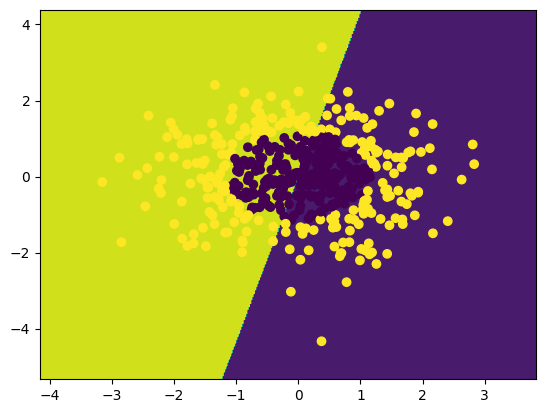

score: 0.532


In [6]:
x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
z = logistic.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
plt.show()

print('score:', logistic.score(x_data, y_data))

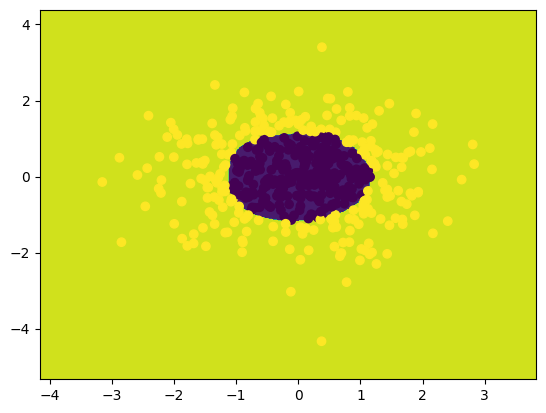

score: 0.994


In [8]:
# 定义多项式回归，degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree = 5)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)

logistic = linear_model.LogisticRegression()

logistic.fit(x_poly, y_data)

x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()])) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
plt.show()

print('score:', logistic.score(x_poly, y_data))